In [3]:
import pandas as pd 
df = pd.read_csv('train.csv')
df.head(2)

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0


In [4]:
df.drop('UID', axis=1, inplace=True)

In [5]:
df.head(2)

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,자가,1941337.5,10년 이상,0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,월세,1979505.0,10년 이상,0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0


In [10]:
# 각 컬럼의 고유값 개수, 결측치 개수, 데이터 타입을 데이터프레임으로 표시
pd.DataFrame({
    '고유값 개수': df.nunique(),
    '결측치 개수': df.isnull().sum(),
    '데이터 타입': df.dtypes
})



,고유값 개수,결측치 개수,데이터 타입
주거 형태,4,0,object
연간 소득,9970,0,float64
현재 직장 근속 연수,10,0,int64
체납 세금 압류 횟수,8,0,int64
개설된 신용계좌 수,33,0,int64
신용 거래 연수,397,0,float64
최대 신용한도,9585,0,float64
신용 문제 발생 횟수,8,0,int64
마지막 연체 이후 경과 개월 수,88,0,int64
개인 파산 횟수,4,0,int64


In [7]:
df['현재 직장 근속 연수'].value_counts()

현재 직장 근속 연수
10년 이상    3828
2년        1225
8년         841
5년         729
7년         619
1년         581
4년         541
3년         523
1년 미만      488
6년         357
9년         268
Name: count, dtype: int64

In [8]:
df['현재 직장 근속 연수'].str.split('년').str[0].value_counts()

현재 직장 근속 연수
10    3828
2     1225
1     1069
8      841
5      729
7      619
4      541
3      523
6      357
9      268
Name: count, dtype: int64

In [9]:
# '년' 문자를 기준으로 분리하고 첫 번째 요소(숫자)만 추출
df['현재 직장 근속 연수'] = df['현재 직장 근속 연수'].str.split('년').str[0]

# '이상'이 포함된 경우 처리 
# df['현재 직장 근속 연수'] = df['현재 직장 근속 연수'].str.replace('이상', '').str.strip()

# 문자열을 숫자로 변환
df['현재 직장 근속 연수'] = pd.to_numeric(df['현재 직장 근속 연수'])

# 결과 확인
print(df['현재 직장 근속 연수'].head())

0    10
1    10
2     4
3     6
4     2
Name: 현재 직장 근속 연수, dtype: int64


In [22]:
# 컬럼명을 영어로 변경
column_mapping = {
    '주거 형태': 'housing_type',
    '연간 소득': 'annual_income', 
    '현재 직장 근속 연수': 'years_employed',
    '체납 세금 압류 횟수': 'tax_liens',
    '개설된 신용계좌 수': 'number_of_credit_accounts',
    '신용 거래 연수': 'years_of_credit_history',
    '최대 신용한도': 'max_credit_limit',
    '신용 문제 발생 횟수': 'credit_problems',
    '마지막 연체 이후 경과 개월 수': 'months_since_last_delinquent',
    '개인 파산 횟수': 'bankruptcies',
    '대출 목적': 'loan_purpose',
    '대출 상환 기간': 'loan_term',
    '현재 대출 잔액': 'current_loan_balance',
    '현재 미상환 신용액': 'current_credit_balance',
    '월 상환 부채액': 'monthly_debt',
    '신용 점수': 'credit_score',
    '채무 불이행 여부': 'default'
}

df.rename(columns=column_mapping, inplace=True)


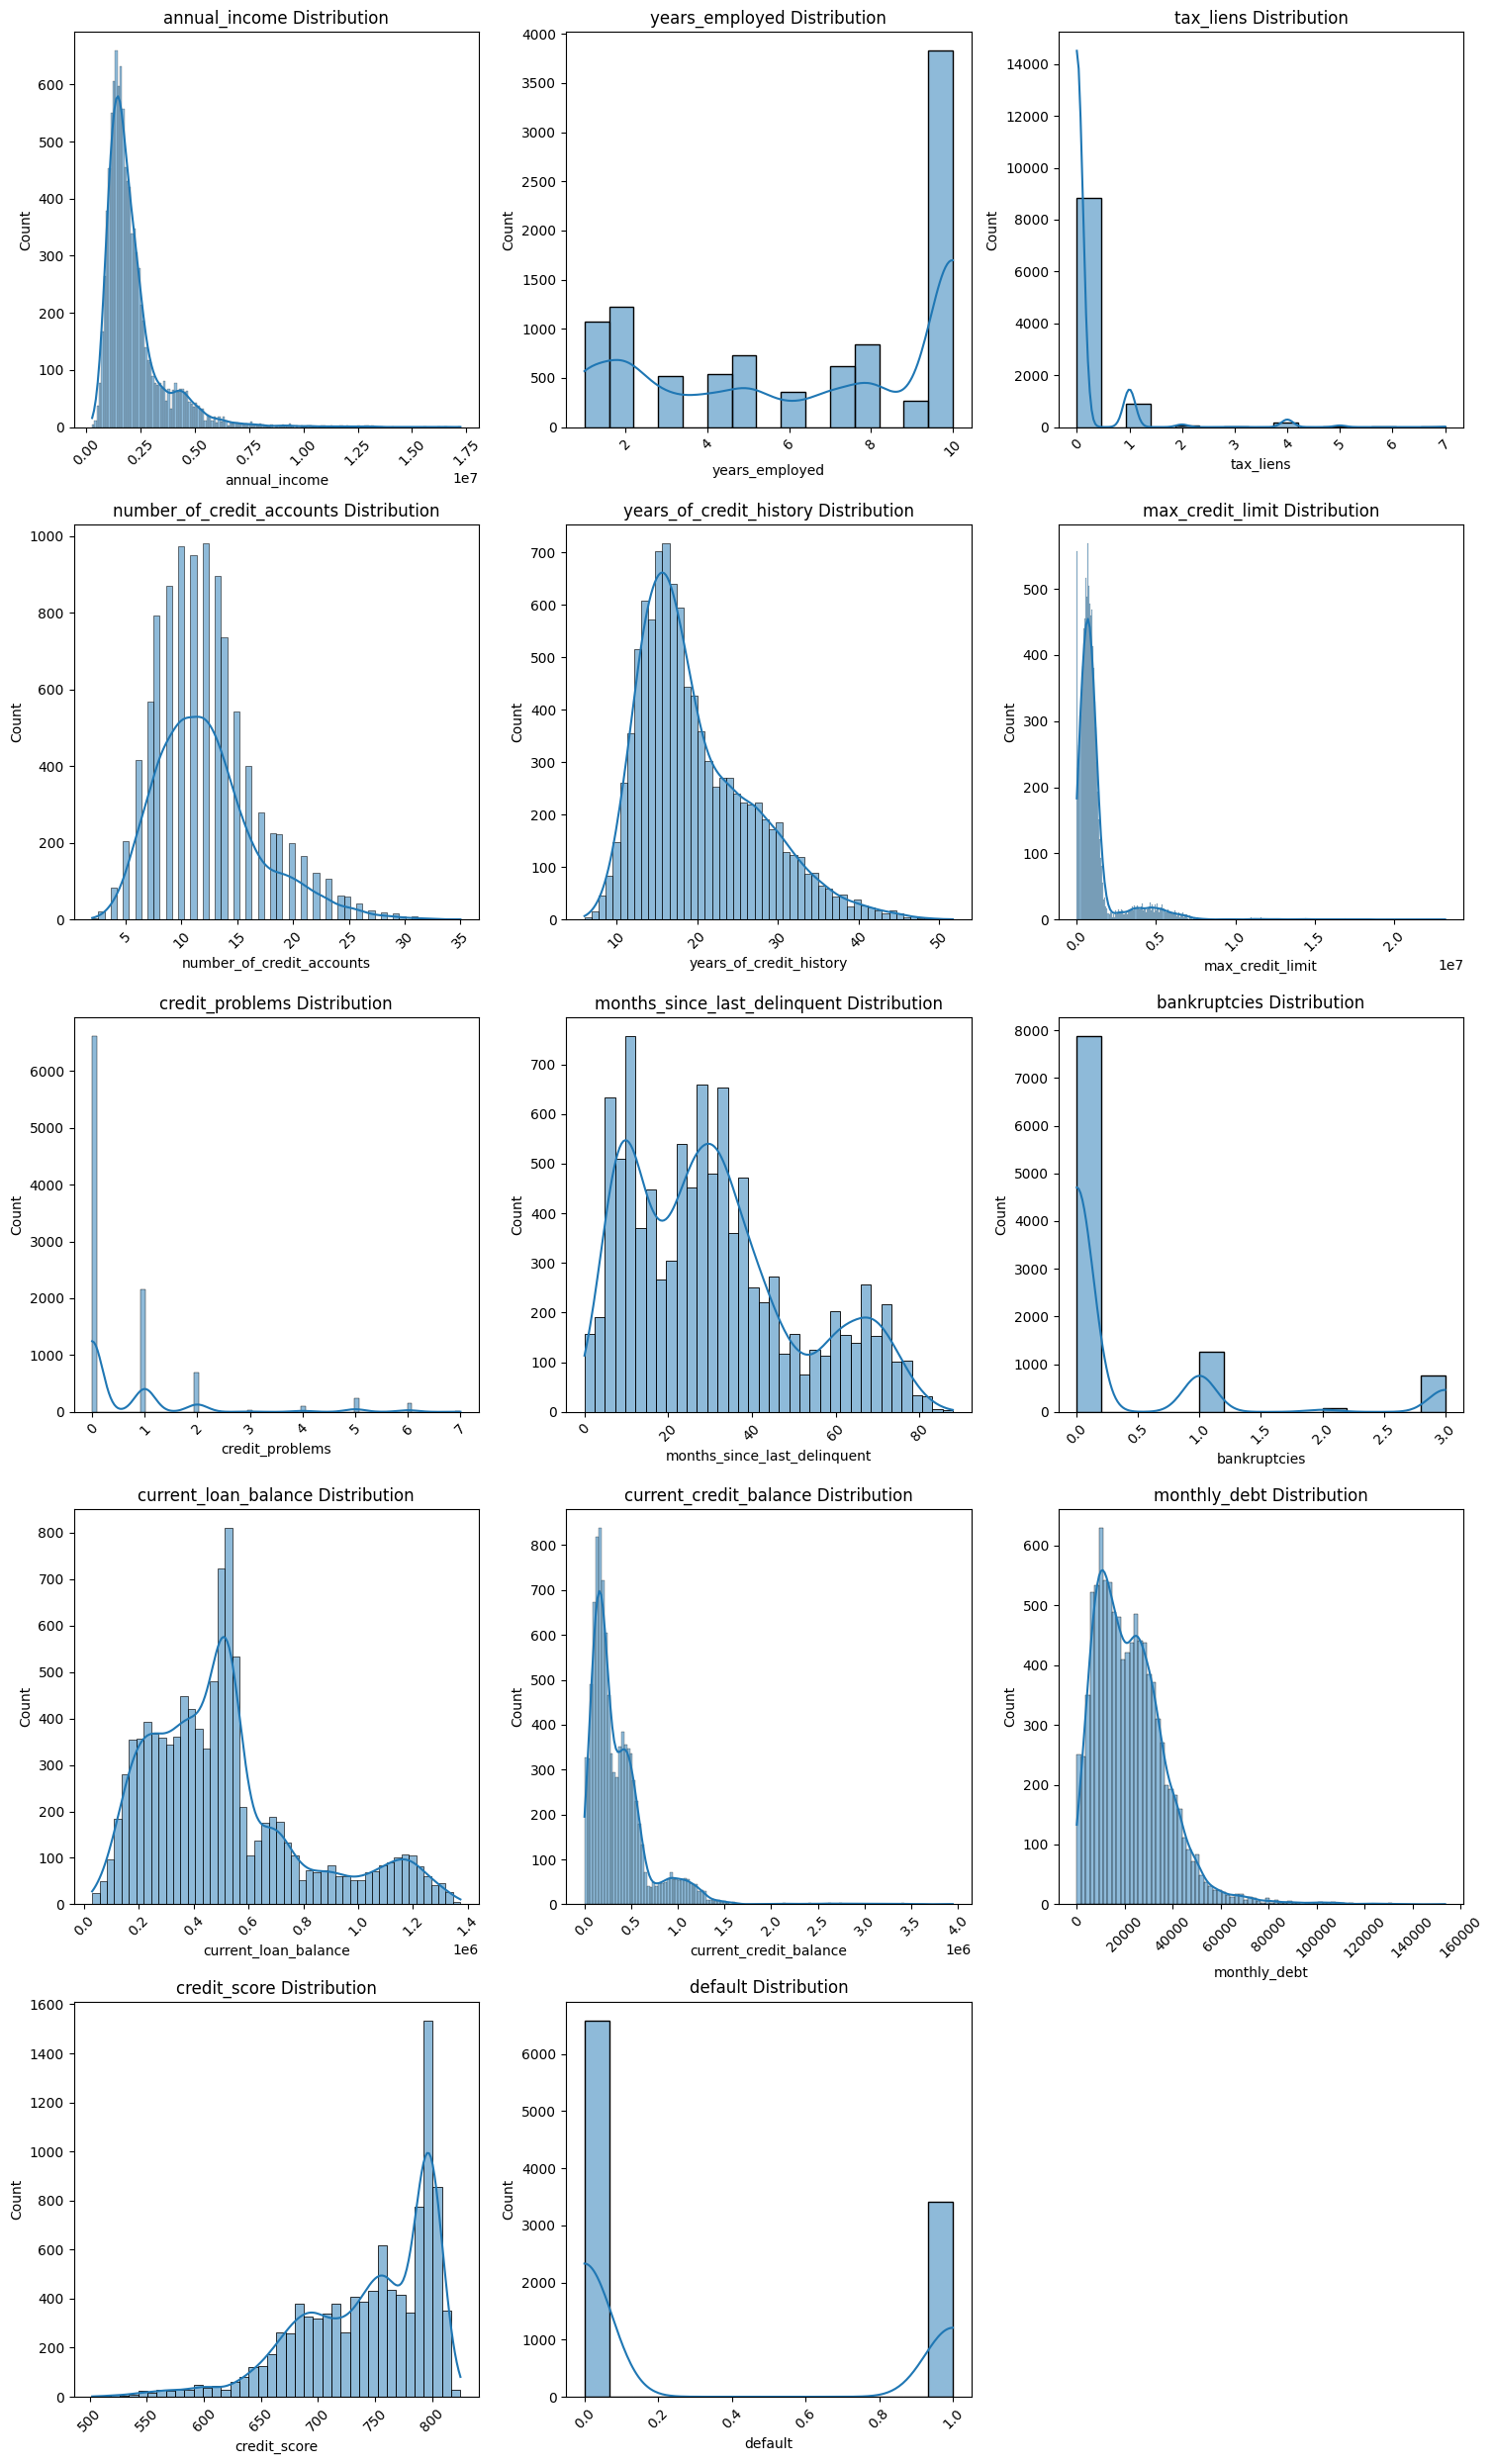

In [14]:
# 수치형 변수들의 분포도 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형(float, int) 컬럼만 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 서브플롯 크기 계산
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# 그래프 크기 설정
plt.figure(figsize=(15, 5*n_rows))

# 각 변수별 분포도 그리기
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [15]:
# object 형 변수들을 category로 변환
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].astype('category')

# 변환 결과 확인
print("데이터 타입 변환 후:")
print(df.dtypes)


데이터 타입 변환 후:
housing_type                    category
annual_income                    float64
years_employed                     int64
tax_liens                          int64
number_of_credit_accounts          int64
years_of_credit_history          float64
max_credit_limit                 float64
credit_problems                    int64
months_since_last_delinquent       int64
bankruptcies                       int64
loan_purpose                    category
loan_term                       category
current_loan_balance             float64
current_credit_balance           float64
monthly_debt                     float64
credit_score                       int64
default                            int64
dtype: object


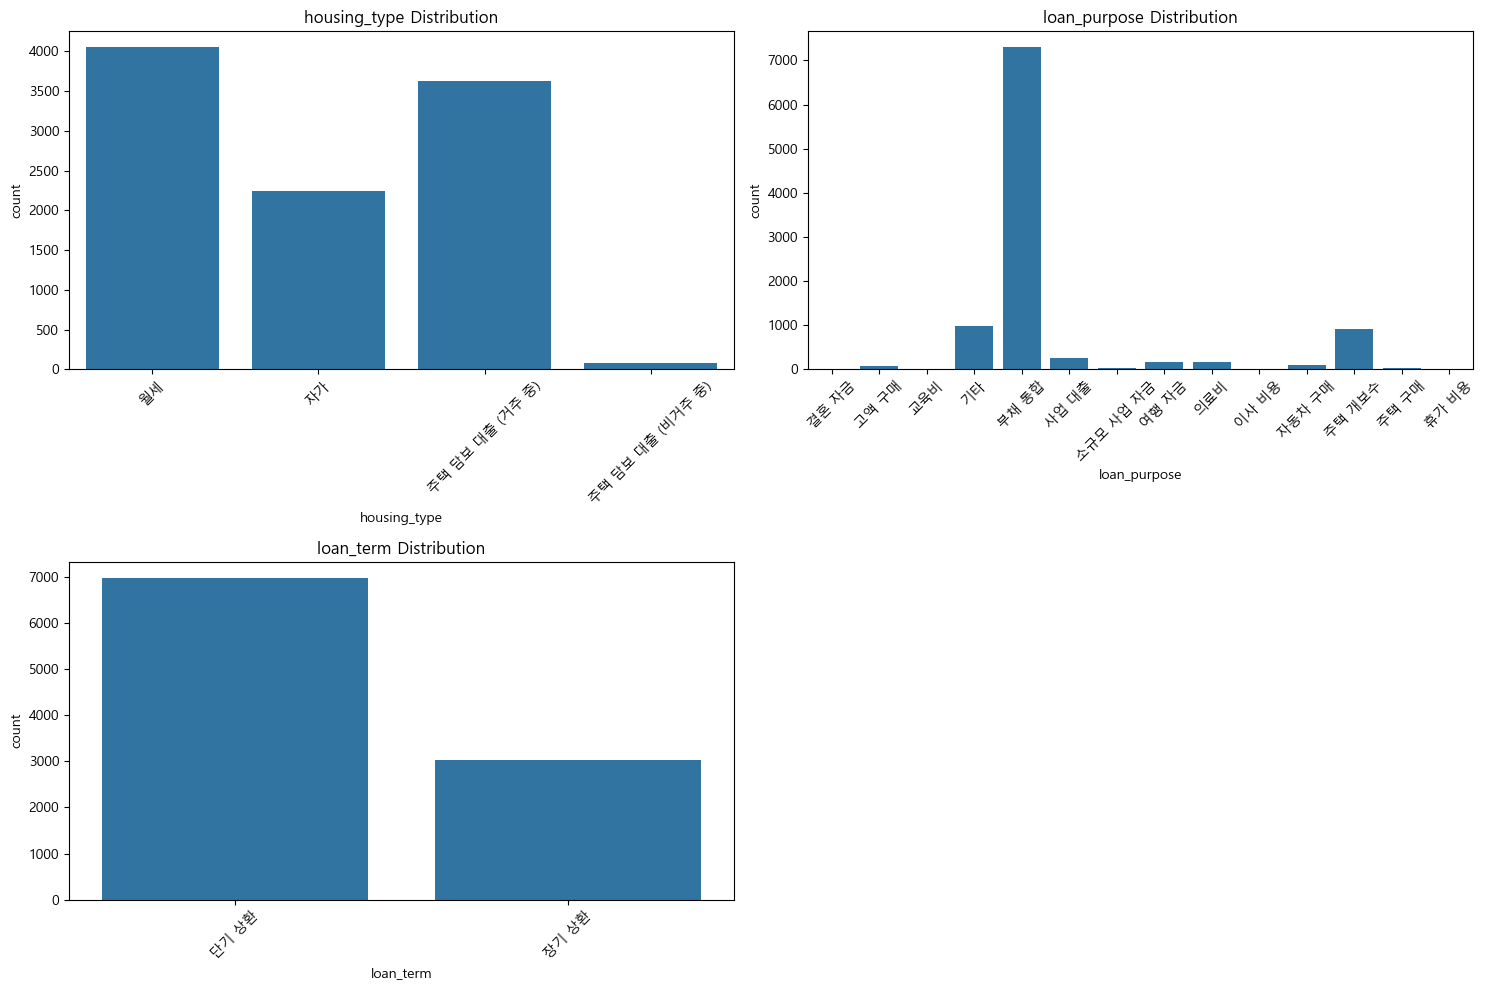

In [18]:
# 범주형 변수들의 분포도 시각화
categorical_columns = df.select_dtypes(include=['category']).columns

# 서브플롯 크기 계산 
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# 그래프 크기 설정
plt.figure(figsize=(15, 5*n_rows))

# 각 변수별 막대 그래프 그리기
for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 폰트 설정 (다른 한글 폰트로 대체 가능)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 마이너스 부호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False


In [23]:
# column_mapping의 key와 value를 서로 바꾸기

# key와 value를 서로 바꾸기
column_mapping_reversed = {v: k for k, v in column_mapping.items()}


In [24]:
df.rename(columns=column_mapping_reversed, inplace=True)
df.head(2)


,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,자가,1941337.5,10,0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,월세,1979505.0,10,0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0


array([[<Axes: title={'center': '연간 소득'}>,
        <Axes: title={'center': '현재 직장 근속 연수'}>,
        <Axes: title={'center': '체납 세금 압류 횟수'}>,
        <Axes: title={'center': '개설된 신용계좌 수'}>],
       [<Axes: title={'center': '신용 거래 연수'}>,
        <Axes: title={'center': '최대 신용한도'}>,
        <Axes: title={'center': '신용 문제 발생 횟수'}>,
        <Axes: title={'center': '마지막 연체 이후 경과 개월 수'}>],
       [<Axes: title={'center': '개인 파산 횟수'}>,
        <Axes: title={'center': '현재 대출 잔액'}>,
        <Axes: title={'center': '현재 미상환 신용액'}>,
        <Axes: title={'center': '월 상환 부채액'}>],
       [<Axes: title={'center': '신용 점수'}>,
        <Axes: title={'center': '채무 불이행 여부'}>, <Axes: >, <Axes: >]],
      dtype=object)

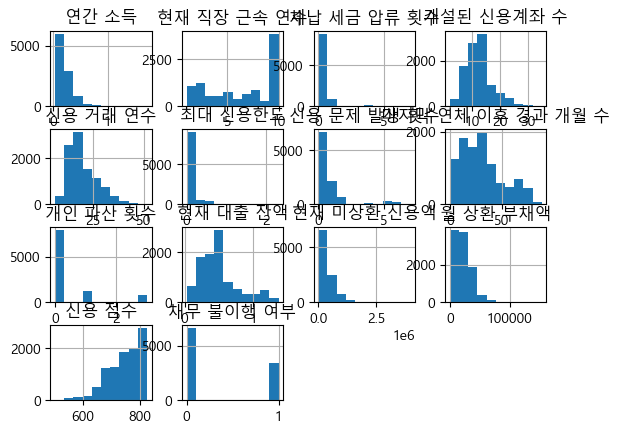

In [27]:
df.hist()

In [31]:
categorical_df = df.select_dtypes(include=['category'])
categorical_df

,주거 형태,대출 목적,대출 상환 기간
0,자가,부채 통합,단기 상환
1,월세,부채 통합,단기 상환
2,월세,부채 통합,단기 상환
3,월세,부채 통합,단기 상환
4,월세,부채 통합,장기 상환
...,...,...,...
9995,주택 담보 대출 (거주 중),부채 통합,단기 상환
9996,주택 담보 대출 (거주 중),주택 개보수,장기 상환
9997,주택 담보 대출 (거주 중),부채 통합,장기 상환
9998,자가,부채 통합,단기 상환


In [34]:
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()
categorical_columns

['주거 형태', '대출 목적', '대출 상환 기간']

In [35]:
df = pd.get_dummies(df, columns=categorical_columns)
df.head(2)

,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,...,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,1941337.5,10,0,9,13.4,400597.5,0,24,1,390903.0,...,False,False,False,False,False,False,False,False,True,False
1,1979505.0,10,0,5,15.1,360679.5,0,11,0,1002184.5,...,False,False,False,False,False,False,False,False,True,False


In [39]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_columns

['연간 소득',
 '현재 직장 근속 연수',
 '체납 세금 압류 횟수',
 '개설된 신용계좌 수',
 '신용 거래 연수',
 '최대 신용한도',
 '신용 문제 발생 횟수',
 '마지막 연체 이후 경과 개월 수',
 '개인 파산 횟수',
 '현재 대출 잔액',
 '현재 미상환 신용액',
 '월 상환 부채액',
 '신용 점수',
 '채무 불이행 여부']

In [49]:
non_scale_columns = []
for i in df[numerical_columns]:
    #print(i, df[i].nunique())
    if df[i].nunique() < 10:
        print(i)
        non_scale_columns.append(i)
non_scale_columns
        

체납 세금 압류 횟수
신용 문제 발생 횟수
개인 파산 횟수
채무 불이행 여부


['체납 세금 압류 횟수', '신용 문제 발생 횟수', '개인 파산 횟수', '채무 불이행 여부']

In [50]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
scale_columns = [col for col in numerical_columns if col not in non_scale_columns]

scaler = StandardScaler()
df[scale_columns] = scaler.fit_transform(df[scale_columns])





In [51]:
df.head()

,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,...,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,-0.155206,1.019466,0,-0.703173,-0.899120,-0.482924,0,-0.344278,1,-0.406937,...,False,False,False,False,False,False,False,False,True,False
1,-0.128597,1.019466,0,-1.568910,-0.663217,-0.507808,0,-0.993935,0,1.752060,...,False,False,False,False,False,False,False,False,True,False
2,-0.563024,-0.717865,0,-0.053870,-0.149779,-0.426087,1,2.154402,3,-0.983092,...,False,False,False,False,False,False,False,False,True,False
3,-0.777310,-0.138755,0,0.595432,-0.704847,-0.476099,1,-0.444225,1,-0.899709,...,False,False,False,False,False,False,False,False,True,False
4,1.503292,-1.296976,0,-0.270305,0.863219,-0.174536,0,0.055511,0,2.320671,...,False,False,False,False,False,False,False,False,False,True


In [53]:
df[numerical_columns].describe()

,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,1.172396e-16,6.643575e-17,0.199300,-1.655565e-16,-2.685852e-16,-1.367795e-17,0.62620,2.984279e-17,0.373200,-6.608047e-17,5.684342e-18,-1.229239e-16,-5.595524e-16,0.341200
std,1.000050e+00,1.000050e+00,0.714304,1.000050e+00,1.000050e+00,1.000050e+00,1.23419,1.000050e+00,0.843797,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.474136
min,-1.322081e+00,-1.586531e+00,0.000000,-2.218213e+00,-1.925995e+00,-7.326543e-01,0.00000,-1.543645e+00,0.000000,-1.684527e+00,-1.031478e+00,-1.472914e+00,-4.249919e+00,0.000000
25%,-5.943577e-01,-1.007420e+00,0.000000,-7.031732e-01,-7.326001e-01,-4.532189e-01,0.00000,-8.440143e-01,0.000000,-7.273280e-01,-6.154366e-01,-7.555465e-01,-7.056148e-01,0.000000
50%,-2.933272e-01,1.508003e-01,0.000000,-5.387049e-02,-2.677312e-01,-2.544535e-01,0.00000,-1.443838e-01,0.000000,-1.122400e-01,-3.112689e-01,-1.453522e-01,2.067803e-01,0.000000
75%,1.977924e-01,1.019466e+00,0.000000,5.954323e-01,5.856849e-01,-1.744376e-02,1.00000,5.052732e-01,0.000000,3.029960e-01,3.109460e-01,5.452464e-01,8.559846e-01,1.000000
max,1.050351e+01,1.019466e+00,7.000000,4.924117e+00,4.415650e+00,1.375027e+01,7.00000,2.854033e+00,3.000000,3.063916e+00,1.012331e+01,8.640161e+00,1.417459e+00,1.000000


In [55]:
df.isnull().sum().sum()

np.int64(0)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define target and feature variables
target = '채무 불이행 여부'
features = [col for col in df.columns if col != target]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize and train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))




Accuracy: 0.698
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1270
           1       0.66      0.36      0.47       730

    accuracy                           0.70      2000
   macro avg       0.68      0.63      0.63      2000
weighted avg       0.69      0.70      0.67      2000

Confusion Matrix:
[[1133  137]
 [ 467  263]]


In [60]:
from sklearn.metrics import roc_auc_score

y_pred_proba = rf.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_proba)

print('AUROC:', auroc)


AUROC: 0.7205830007550427


In [66]:
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score

scorer = make_scorer(roc_auc_score)
rf = RandomForestClassifier(n_estimators=100, random_state=11)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=scorer)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=11)

In [68]:
# Make predictions on the validation set
y_pred = rf.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

y_pred_proba = rf.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_proba)

print('AUROC:', auroc)

Accuracy: 0.6975
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1270
           1       0.66      0.35      0.46       730

    accuracy                           0.70      2000
   macro avg       0.68      0.62      0.62      2000
weighted avg       0.69      0.70      0.67      2000

Confusion Matrix:
[[1138  132]
 [ 473  257]]
AUROC: 0.7208844784812858


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        'max_depth': [None] + list(range(1, 20)),
        'min_samples_split': list(range(2, 11)),
        'min_samples_leaf': list(range(1, 11)),
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }

forest_reg = RandomForestClassifier(random_state=11)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='roc_auc', random_state=11)
rnd_search.fit(X_train, y_train)



RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=11),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018DB99175C0>,
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018DBB84D370>},
                   random_state=11, scoring='roc_auc')

In [70]:
rnd_search.cv_results_

{'mean_fit_time': array([0.27713401, 0.90786819, 0.32493134, 2.5015713 , 5.96147878,
        0.32218907, 3.37902381, 0.14286637, 1.93235004, 4.23214591]),
 'std_fit_time': array([0.02311458, 0.06037338, 0.02702749, 0.09420136, 2.17261795,
        0.05042347, 1.48999917, 0.01025322, 0.25191289, 1.15891197]),
 'mean_score_time': array([0.00609658, 0.01938848, 0.01008792, 0.03417742, 0.06933115,
        0.01625626, 0.04095204, 0.00930684, 0.02534392, 0.07581382]),
 'std_score_time': array([0.00053911, 0.00174015, 0.00117532, 0.00361811, 0.04285113,
        0.004722  , 0.02015137, 0.00077914, 0.00281325, 0.04041013]),
 'param_bootstrap': masked_array(data=[False, True, False, False, False, False, True, False,
                    True, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=True),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'gini', 'gini', 'entropy',
                    'entrop

In [71]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.277134,0.023115,0.006097,0.000539,False,entropy,16,4,2,9,...,0.695026,0.687847,0.725701,0.728341,0.713718,0.723458,0.739339,0.719158,0.023406,10
1,0.907868,0.060373,0.019388,0.001740,True,entropy,7,3,9,2,...,0.731378,0.697530,0.740875,0.737410,0.744480,0.731621,0.778506,0.742200,0.022528,4
2,0.324931,0.027027,0.010088,0.001175,False,gini,4,3,2,7,...,0.719609,0.691722,0.734401,0.724315,0.731301,0.724382,0.768334,0.730329,0.019029,7
3,2.501571,0.094201,0.034177,0.003618,False,gini,17,4,7,4,...,0.730642,0.704333,0.734016,0.738182,0.749691,0.740155,0.774333,0.742950,0.021471,2
4,5.961479,2.172618,0.069331,0.042851,False,entropy,None,4,7,7,...,0.735320,0.698869,0.738743,0.741647,0.745637,0.738608,0.770805,0.742736,0.022324,3
5,0.322189,0.050423,0.016256,0.004722,False,entropy,15,1,9,2,...,0.704922,0.697649,0.729898,0.729821,0.726812,0.728415,0.752393,0.729932,0.020950,8
6,3.379024,1.489999,0.040952,0.020151,True,entropy,5,6,8,4,...,0.722338,0.700532,0.728671,0.735236,0.743000,0.730025,0.780935,0.738293,0.021716,5
7,0.142866,0.010253,0.009307,0.000779,False,gini,3,1,8,3,...,0.707377,0.682818,0.729597,0.720791,0.711964,0.703831,0.756751,0.719735,0.020813,9
8,1.932350,0.251913,0.025344,0.002813,True,gini,None,7,4,7,...,0.724870,0.695896,0.733160,0.728846,0.737985,0.734722,0.759940,0.735482,0.022764,6
9,4.232146,1.158912,0.075814,0.040410,True,entropy,17,4,3,2,...,0.732297,0.704158,0.736239,0.739178,0.747075,0.742696,0.774949,0.743347,0.022592,1


In [73]:
rnd_search.estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 11,
 'verbose': 0,
 'warm_start': False}

In [74]:
# Make predictions on the validation set
y_pred = rnd_search.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

y_pred_proba = rnd_search.predict_proba(X_test)[:,1]
auroc = roc_auc_score(y_test, y_pred_proba)

print('AUROC:', auroc)

Accuracy: 0.6945
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1270
           1       0.67      0.32      0.44       730

    accuracy                           0.69      2000
   macro avg       0.68      0.62      0.61      2000
weighted avg       0.69      0.69      0.66      2000

Confusion Matrix:
[[1153  117]
 [ 494  236]]
AUROC: 0.7336900010786324


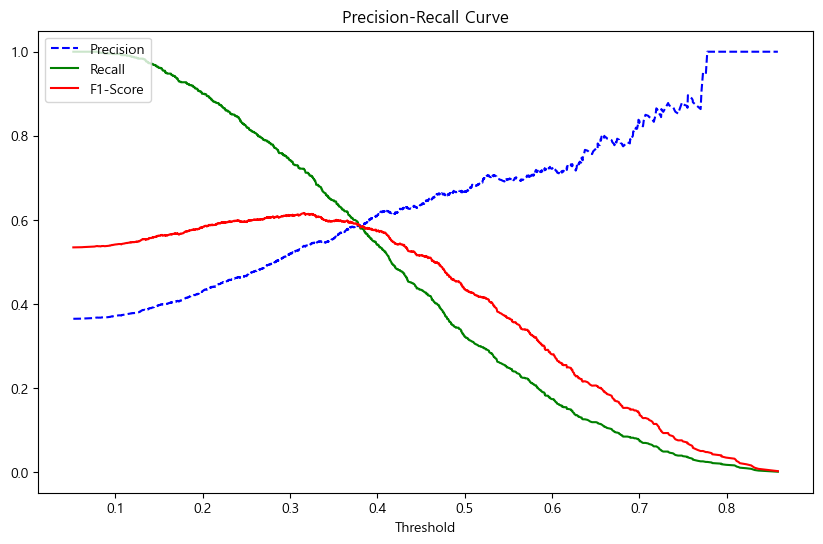

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, f1_score

y_scores = rnd_search.predict_proba(X_val)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)
f1_scores = [2*(precision*recall)/(precision+recall) for precision, recall in zip(precisions, recalls)]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.plot(thresholds, f1_scores[:-1], "r-", label="F1-Score")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.title('Precision-Recall Curve')
plt.show()



In [81]:
from sklearn.metrics import confusion_matrix

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    y_pred_proba = rnd_search.predict_proba(X_val)[:,1]
    y_pred = (y_pred_proba >= threshold).astype('int')
    cm = confusion_matrix(y_val, y_pred)
    total = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
    positive_count = cm[1][1]
    positive_ratio = positive_count / total
    print(f'Threshold: {threshold}, Positive Count: {positive_count}, Positive Ratio: {positive_ratio:.4f}')



Threshold: 0.1, Positive Count: 726, Positive Ratio: 0.3630
Threshold: 0.2, Positive Count: 657, Positive Ratio: 0.3285
Threshold: 0.3, Positive Count: 542, Positive Ratio: 0.2710
Threshold: 0.4, Positive Count: 395, Positive Ratio: 0.1975
Threshold: 0.5, Positive Count: 236, Positive Ratio: 0.1180
Threshold: 0.6, Positive Count: 127, Positive Ratio: 0.0635
Threshold: 0.7, Positive Count: 55, Positive Ratio: 0.0275
Threshold: 0.8, Positive Count: 12, Positive Ratio: 0.0060
Threshold: 0.9, Positive Count: 0, Positive Ratio: 0.0000
